In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
import xgboost as xgb
from sklearn.feature_selection import RFECV

In [2]:
df = pd.read_csv('FBREF_PL - merged_FBREF (2).csv')
df

,Date,Team,Opponent,Referee,TY,OY,TR,OR,B365TW,B365D,...,Clean Sheet,Pass Completion %,Assists,Exp. Assisted Goals,Expected Assists,Tackles Won,% of Dribblers Tackled,Blocks,Interceptions,Error
0,2018-08-10,Leicester City,Manchester Utd,A Marriner,1,2,0,0,7.50,3.90,...,0,79.4,0,0.8,1.0,11,21.4,8,12,0
1,2018-08-10,Manchester Utd,Leicester City,A Marriner,2,1,0,0,1.57,3.90,...,0,80.1,1,0.7,0.3,13,50.0,15,17,0
2,2018-08-11,Bournemouth,Cardiff City,K Friend,1,1,0,0,1.90,3.60,...,1,79.0,2,1.3,1.1,5,47.1,11,4,0
3,2018-08-11,Brighton & Hove Albion,Watford,J Moss,2,2,0,0,3.40,3.20,...,0,74.4,0,0.3,0.2,11,50.0,14,17,0
4,2018-08-11,Cardiff City,Bournemouth,K Friend,1,1,0,0,4.50,3.60,...,0,58.4,0,1.5,1.2,12,47.6,16,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4421,2024-04-06,Crystal Palace,Manchester City,P Tierney,1,1,0,0,9.50,5.25,...,0,76.6,2,0.9,0.5,10,66.7,16,12,0
4422,2024-04-06,Everton,Burnley,M Oliver,2,1,0,1,1.65,4.00,...,1,64.6,0,0.6,0.4,11,54.5,11,11,0
4423,2024-04-06,Newcastle Utd,Fulham,S Allison,2,1,0,0,2.80,3.80,...,1,74.7,0,0.7,0.7,6,25.0,20,10,1
4424,2024-04-06,Wolverhampton,West Ham,T Harrington,5,2,0,0,2.50,3.60,...,0,85.5,0,0.6,1.1,21,63.6,12,7,0


In [3]:
df.columns

Index(['Date', 'Team', 'Opponent', 'Referee', 'TY', 'OY', 'TR', 'OR', 'B365TW',
       'B365D', 'B365OW', 'Season', 'Time', 'Round', 'Round.1', 'Table', 'Day',
       'Venue', 'Result', 'Possesion', 'Aerial Duels(%)', 'GF', 'GA',
       'Oppo. Table', 'Shot on Target', 'Shot on Target(%)', 'Goals per Shot',
       'Expected Goals', 'Save%', 'Clean Sheet', 'Pass Completion %',
       'Assists', 'Exp. Assisted Goals', 'Expected Assists', 'Tackles Won',
       '% of Dribblers Tackled', 'Blocks', 'Interceptions', 'Error'],
      dtype='object')

# 인코딩 작업

In [4]:
label_encoder = LabelEncoder()

df['le_Venue'] = label_encoder.fit_transform(df['Venue'])
df['le_Venue']
# Home은 1, Away는 0

0       0
1       1
2       1
3       0
4       0
       ..
4421    1
4422    1
4423    0
4424    1
4425    1
Name: le_Venue, Length: 4426, dtype: int64

In [5]:
df['le_Result'] = label_encoder.fit_transform(df['Result'])
df['le_Result']
# lose : 1, win : 2, draw : 0

0       1
1       2
2       2
3       1
4       1
       ..
4421    1
4422    2
4423    2
4424    1
4425    1
Name: le_Result, Length: 4426, dtype: int64

In [6]:
df['le_Day'] = label_encoder.fit_transform(df['Day'])
df['le_Day']
# 금요일 : 0 ~ 목요일 : 6

0       0
1       0
2       2
3       2
4       2
       ..
4421    2
4422    2
4423    2
4424    2
4425    2
Name: le_Day, Length: 4426, dtype: int64

In [7]:
df['le_Referee'] = label_encoder.fit_transform(df['Referee'])
df['le_Referee']

0        1
1        1
2       15
3       13
4       15
        ..
4421    25
4422    21
4423    30
4424    37
4425    11
Name: le_Referee, Length: 4426, dtype: int64

In [8]:
df.columns

Index(['Date', 'Team', 'Opponent', 'Referee', 'TY', 'OY', 'TR', 'OR', 'B365TW',
       'B365D', 'B365OW', 'Season', 'Time', 'Round', 'Round.1', 'Table', 'Day',
       'Venue', 'Result', 'Possesion', 'Aerial Duels(%)', 'GF', 'GA',
       'Oppo. Table', 'Shot on Target', 'Shot on Target(%)', 'Goals per Shot',
       'Expected Goals', 'Save%', 'Clean Sheet', 'Pass Completion %',
       'Assists', 'Exp. Assisted Goals', 'Expected Assists', 'Tackles Won',
       '% of Dribblers Tackled', 'Blocks', 'Interceptions', 'Error',
       'le_Venue', 'le_Result', 'le_Day', 'le_Referee'],
      dtype='object')

In [9]:
club_games = pd.read_csv('club_games.csv')
games = pd.read_csv('games.csv')

In [10]:
games = games[games['competition_id'] == 'GB1']
games['date'] = pd.to_datetime(games['date'])
games = games[games['date'] >= '2018-08-01']
games

,game_id,competition_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,...,stadium,attendance,referee,url,home_club_formation,away_club_formation,home_club_name,away_club_name,aggregate,competition_type
1876,3050170,GB1,2018,1. Matchday,2018-08-11,1110,631,0,3,19.0,...,John Smith's Stadium,24121.0,Chris Kavanagh,https://www.transfermarkt.co.uk/huddersfield-t...,3-5-2 flat,4-3-3 Attacking,Huddersfield Town,Chelsea Football Club,0:3,domestic_league
1877,3050215,GB1,2018,5. Matchday,2018-09-15,1010,985,1,2,4.0,...,Vicarage Road,20537.0,Mike Dean,https://www.transfermarkt.co.uk/watford-fc_man...,4-4-2,4-2-3-1,Watford FC,Manchester United Football Club,1:2,domestic_league
1878,3050250,GB1,2018,9. Matchday,2018-10-20,631,985,2,2,3.0,...,Stamford Bridge,40721.0,Mike Dean,https://www.transfermarkt.co.uk/chelsea-fc_man...,4-3-3 Attacking,4-3-3 Attacking,Chelsea Football Club,Manchester United Football Club,2:2,domestic_league
1879,3050264,GB1,2018,10. Matchday,2018-10-27,180,762,0,0,16.0,...,St Mary's Stadium,30736.0,Chris Kavanagh,https://www.transfermarkt.co.uk/southampton-fc...,4-4-2 double 6,4-4-2 double 6,Southampton FC,Newcastle United Football Club,0:0,domestic_league
1880,3050336,GB1,2018,17. Matchday,2018-12-15,543,989,2,0,7.0,...,Molineux Stadium,30997.0,Simon Hooper,https://www.transfermarkt.co.uk/wolverhampton-...,3-5-2,3-4-2-1,Wolverhampton Wanderers Football Club,Association Football Club Bournemouth,2:0,domestic_league
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66901,3050278,GB1,2018,12. Matchday,2018-11-10,603,1237,2,1,18.0,...,Cardiff City Stadium,29402.0,Martin Atkinson,https://www.transfermarkt.co.uk/cardiff-city_b...,4-3-3 Attacking,4-2-3-1,Cardiff City,Brighton and Hove Albion Football Club,2:1,domestic_league
66913,3421741,GB1,2020,7. Matchday,2020-11-01,148,1237,2,1,3.0,...,Tottenham Hotspur Stadium,NaN,Graham Scott,https://www.transfermarkt.co.uk/tottenham-hots...,4-2-3-1,3-5-2 flat,Tottenham Hotspur Football Club,Brighton and Hove Albion Football Club,2:1,domestic_league
66914,3429714,GB1,2020,23. Matchday,2021-02-06,1132,1237,1,1,17.0,...,Turf Moor,NaN,Anthony Taylor,https://www.transfermarkt.co.uk/burnley-fc_bri...,4-4-2 double 6,5-3-2,Burnley Football Club,Brighton and Hove Albion Football Club,1:1,domestic_league
67152,3429694,GB1,2020,21. Matchday,2021-01-31,1237,148,1,0,17.0,...,AMEX Stadium,NaN,Peter Bankes,https://www.transfermarkt.co.uk/brighton-amp-h...,3-4-2-1,3-4-2-1,Brighton and Hove Albion Football Club,Tottenham Hotspur Football Club,1:0,domestic_league


In [11]:
club_games= club_games[club_games['game_id'].isin(games['game_id'])]

In [12]:
# games와 club_games merge
merged = pd.merge(games[['game_id', 'date']], club_games, on='game_id', how='right')
merged.sort_values('game_id')

,game_id,date,club_id,own_goals,own_position,own_manager_name,opponent_id,opponent_goals,opponent_position,opponent_manager_name,hosting,is_win
917,3050167,2018-08-12,11,0,15.0,Unai Emery,281,2,3.0,Pep Guardiola,Home,0
3100,3050167,2018-08-12,281,2,3.0,Pep Guardiola,11,0,15.0,Unai Emery,Away,1
4192,3050168,2018-08-11,603,0,17.0,Neil Warnock,989,2,5.0,Eddie Howe,Away,0
2009,3050168,2018-08-11,989,2,5.0,Eddie Howe,603,0,17.0,Neil Warnock,Home,1
918,3050169,2018-08-11,931,0,18.0,Slavisa Jokanovic,873,2,4.0,Roy Hodgson,Home,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1156,4095365,2024-03-16,931,3,12.0,Marco Silva,148,0,5.0,Ange Postecoglou,Home,1
225,4095366,2024-03-16,1031,1,17.0,Rob Edwards,703,1,18.0,Nuno Espírito Santo,Home,0
2408,4095366,2024-03-16,703,1,18.0,Nuno Espírito Santo,1031,1,17.0,Rob Edwards,Away,0
4187,4095368,2024-03-17,405,1,4.0,Unai Emery,379,1,7.0,David Moyes,Away,0


In [13]:
merged_home = merged[merged['hosting'] == 'Home']
merged_away = merged[merged['hosting'] == 'Away']

In [14]:
home_game = pd.merge(merged_home, games[['game_id', 'home_club_name']], on='game_id')
home_game.sort_values('game_id')

,game_id,date,club_id,own_goals,own_position,own_manager_name,opponent_id,opponent_goals,opponent_position,opponent_manager_name,hosting,is_win,home_club_name
917,3050167,2018-08-12,11,0,15.0,Unai Emery,281,2,3.0,Pep Guardiola,Home,0,Arsenal Football Club
2009,3050168,2018-08-11,989,2,5.0,Eddie Howe,603,0,17.0,Neil Warnock,Home,1,Association Football Club Bournemouth
918,3050169,2018-08-11,931,0,18.0,Slavisa Jokanovic,873,2,4.0,Roy Hodgson,Home,0,Fulham Football Club
0,3050170,2018-08-11,1110,0,19.0,David Wagner,631,3,2.0,Maurizio Sarri,Home,0,Huddersfield Town
1323,3050171,2018-08-12,31,4,1.0,Jürgen Klopp,379,0,20.0,Manuel Pellegrini,Home,1,Liverpool Football Club
...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,4095359,2024-03-09,543,2,9.0,Gary O'Neil,931,1,12.0,Marco Silva,Home,1,Wolverhampton Wanderers Football Club
1604,4095362,2024-03-16,1132,2,19.0,Vincent Kompany,1148,1,15.0,Thomas Frank,Home,1,Burnley Football Club
1156,4095365,2024-03-16,931,3,12.0,Marco Silva,148,0,5.0,Ange Postecoglou,Home,1,Fulham Football Club
225,4095366,2024-03-16,1031,1,17.0,Rob Edwards,703,1,18.0,Nuno Espírito Santo,Home,0,Luton Town Football Club


In [15]:
new_column_names = {'home_club_name': 'club_name'}
home_game = home_game.rename(columns=new_column_names)

In [16]:
away_game= pd.merge(merged_away, games[['game_id', 'away_club_name']], on='game_id')
away_game.sort_values('game_id')

,game_id,date,club_id,own_goals,own_position,own_manager_name,opponent_id,opponent_goals,opponent_position,opponent_manager_name,hosting,is_win,away_club_name
917,3050167,2018-08-12,281,2,3.0,Pep Guardiola,11,0,15.0,Unai Emery,Away,1,Manchester City Football Club
2009,3050168,2018-08-11,603,0,17.0,Neil Warnock,989,2,5.0,Eddie Howe,Away,0,Cardiff City
918,3050169,2018-08-11,873,2,4.0,Roy Hodgson,931,0,18.0,Slavisa Jokanovic,Away,1,Crystal Palace Football Club
0,3050170,2018-08-11,631,3,2.0,Maurizio Sarri,1110,0,19.0,David Wagner,Away,1,Chelsea Football Club
1323,3050171,2018-08-12,379,0,20.0,Manuel Pellegrini,31,4,1.0,Jürgen Klopp,Away,0,West Ham United Football Club
...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,4095359,2024-03-09,931,1,12.0,Marco Silva,543,2,9.0,Gary O'Neil,Away,0,Fulham Football Club
1604,4095362,2024-03-16,1148,1,15.0,Thomas Frank,1132,2,19.0,Vincent Kompany,Away,0,Brentford Football Club
1156,4095365,2024-03-16,148,0,5.0,Ange Postecoglou,931,3,12.0,Marco Silva,Away,0,Tottenham Hotspur Football Club
225,4095366,2024-03-16,703,1,18.0,Nuno Espírito Santo,1031,1,17.0,Rob Edwards,Away,0,Nottingham Forest Football Club


In [17]:
new_column_names = {'away_club_name': 'club_name'}
away_game= away_game.rename(columns=new_column_names)

In [18]:
m_merged = pd.concat([home_game, away_game], axis=0).sort_values('game_id')
dropped= df.drop(['Season', 'Time', 'Round', 'Round.1', 'Day', 'Referee'], axis=1)
dropped.columns

Index(['Date', 'Team', 'Opponent', 'TY', 'OY', 'TR', 'OR', 'B365TW', 'B365D',
       'B365OW', 'Table', 'Venue', 'Result', 'Possesion', 'Aerial Duels(%)',
       'GF', 'GA', 'Oppo. Table', 'Shot on Target', 'Shot on Target(%)',
       'Goals per Shot', 'Expected Goals', 'Save%', 'Clean Sheet',
       'Pass Completion %', 'Assists', 'Exp. Assisted Goals',
       'Expected Assists', 'Tackles Won', '% of Dribblers Tackled', 'Blocks',
       'Interceptions', 'Error', 'le_Venue', 'le_Result', 'le_Day',
       'le_Referee'],
      dtype='object')

In [19]:
# df와 mergeg하려고 club name 다시 설정
name_mapping = {
    'Arsenal Football Club': 'Arsenal', 
    'Manchester City Football Club': 'Manchester City',
    'Cardiff City': 'Cardiff City', 
    'Association Football Club Bournemouth': 'Bournemouth',
    'Fulham Football Club': 'Fulham', 
    'Crystal Palace Football Club': 'Crystal Palace',
    'Huddersfield Town': 'Huddersfield', 
    'Chelsea Football Club': 'Chelsea',
    'West Ham United Football Club': 'West Ham', 
    'Liverpool Football Club': 'Liverpool',
    'Manchester United Football Club': 'Manchester Utd', 
    'Leicester City': 'Leicester City',
    'Newcastle United Football Club': 'Newcastle Utd',
    'Tottenham Hotspur Football Club': 'Tottenham', 
    'Burnley Football Club': 'Burnley',
    'Southampton FC': 'Southampton', 
    'Watford FC': 'Watford',
    'Brighton and Hove Albion Football Club': 'Brighton & Hove Albion',
    'Wolverhampton Wanderers Football Club': 'Wolverhampton', 
    'Everton Football Club': 'Everton',
    'Norwich City': 'Norwich City', 
    'Sheffield United Football Club': 'Sheffield Utd',
    'Aston Villa Football Club': 'Aston Villa', 
    'Leeds United': 'Leeds United',
    'West Bromwich Albion': 'West Bromwich Albion', 
    'Brentford Football Club': 'Brentford',
    'Nottingham Forest Football Club': 'Nottingham Forest', 
    'Luton Town Football Club': 'Luton Town'
}

In [20]:
m_merged['club_name'] = m_merged['club_name'].replace(name_mapping)

In [21]:
# club_games랑 games df를 전처리한 건 df DataFrame에 감독 이름을 추가하기 위함.
dropped['B365TW'] = (1/dropped['B365TW'])*100
dropped['B365D'] = (1/dropped['B365D'])*100
dropped['B365OW'] = (1/dropped['B365OW'])*100

dropped.columns

Index(['Date', 'Team', 'Opponent', 'TY', 'OY', 'TR', 'OR', 'B365TW', 'B365D',
       'B365OW', 'Table', 'Venue', 'Result', 'Possesion', 'Aerial Duels(%)',
       'GF', 'GA', 'Oppo. Table', 'Shot on Target', 'Shot on Target(%)',
       'Goals per Shot', 'Expected Goals', 'Save%', 'Clean Sheet',
       'Pass Completion %', 'Assists', 'Exp. Assisted Goals',
       'Expected Assists', 'Tackles Won', '% of Dribblers Tackled', 'Blocks',
       'Interceptions', 'Error', 'le_Venue', 'le_Result', 'le_Day',
       'le_Referee'],
      dtype='object')

In [22]:
dropped['Date'] = pd.to_datetime(dropped['Date'])
master = pd.merge(m_merged[['date', 'club_name', 'club_id', 'opponent_id', 'own_manager_name', 'opponent_manager_name']], dropped, \
         left_on=['date', 'club_name'], right_on=['Date', 'Team'])

In [23]:
master = master.drop(['date', 'club_name'], axis=1)
master.columns

Index(['club_id', 'opponent_id', 'own_manager_name', 'opponent_manager_name',
       'Date', 'Team', 'Opponent', 'TY', 'OY', 'TR', 'OR', 'B365TW', 'B365D',
       'B365OW', 'Table', 'Venue', 'Result', 'Possesion', 'Aerial Duels(%)',
       'GF', 'GA', 'Oppo. Table', 'Shot on Target', 'Shot on Target(%)',
       'Goals per Shot', 'Expected Goals', 'Save%', 'Clean Sheet',
       'Pass Completion %', 'Assists', 'Exp. Assisted Goals',
       'Expected Assists', 'Tackles Won', '% of Dribblers Tackled', 'Blocks',
       'Interceptions', 'Error', 'le_Venue', 'le_Result', 'le_Day',
       'le_Referee'],
      dtype='object')

In [24]:
new_column_order = ['Date', 'Team', 'Opponent', 'club_id', 'opponent_id', 'own_manager_name', 'opponent_manager_name',
       'TY', 'OY', 'TR', 'OR', 'B365TW', 'B365D',
       'B365OW', 'Table', 'Venue', 'Result', 'Possesion', 'Aerial Duels(%)',
       'GF', 'GA', 'Oppo. Table', 'Shot on Target', 'Shot on Target(%)',
       'Goals per Shot', 'Expected Goals', 'Save%', 'Clean Sheet',
       'Pass Completion %', 'Assists', 'Exp. Assisted Goals',
       'Expected Assists', 'Tackles Won', '% of Dribblers Tackled', 'Blocks',
       'Interceptions', 'Error']

In [25]:
master = master[new_column_order]
master

,Date,Team,Opponent,club_id,opponent_id,own_manager_name,opponent_manager_name,TY,OY,TR,...,Clean Sheet,Pass Completion %,Assists,Exp. Assisted Goals,Expected Assists,Tackles Won,% of Dribblers Tackled,Blocks,Interceptions,Error
0,2018-08-12,Arsenal,Manchester City,11,281,Unai Emery,Pep Guardiola,2,2,0,...,0,77.1,0,0.5,0.6,14,40.0,13,12,1
1,2018-08-12,Manchester City,Arsenal,281,11,Pep Guardiola,Unai Emery,2,2,0,...,1,81.9,2,0.5,0.4,5,28.6,14,12,1
2,2018-08-11,Cardiff City,Bournemouth,603,989,Neil Warnock,Eddie Howe,1,1,0,...,0,58.4,0,1.5,1.2,12,47.6,16,15,0
3,2018-08-11,Bournemouth,Cardiff City,989,603,Eddie Howe,Neil Warnock,1,1,0,...,1,79.0,2,1.3,1.1,5,47.1,11,4,0
4,2018-08-11,Fulham,Crystal Palace,931,873,Slavisa Jokanovic,Roy Hodgson,1,2,0,...,0,85.2,0,0.5,0.7,19,42.9,5,15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4361,2024-03-16,Fulham,Tottenham,931,148,Marco Silva,Ange Postecoglou,2,3,0,...,1,75.8,2,1.5,1.3,9,53.6,15,13,0
4362,2024-03-16,Luton Town,Nottingham Forest,1031,703,Rob Edwards,Nuno Espírito Santo,1,2,0,...,0,78.2,1,0.4,0.7,5,36.4,15,5,0
4363,2024-03-16,Nottingham Forest,Luton Town,703,1031,Nuno Espírito Santo,Rob Edwards,2,1,0,...,0,68.8,1,1.7,1.4,17,48.1,14,7,0
4364,2024-03-17,Aston Villa,West Ham,405,379,Unai Emery,David Moyes,3,3,0,...,0,85.3,1,0.5,0.9,10,53.8,9,3,1


In [26]:
# 라벨 인코더 객체 생성
label_encoder = LabelEncoder()

# 라벨 인코딩 적용
master['le_own_manager_name'] = label_encoder.fit_transform(master['own_manager_name'])

In [27]:
label_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
label_mapping

{'Aaron Danks': 0,
 'Adam Sadler': 1,
 'Albert Stuivenberg': 2,
 'Andoni Iraola': 3,
 'Ange Postecoglou': 4,
 'Antonio Conte': 5,
 'Björn Hamberg': 6,
 'Brendan Rodgers': 7,
 'Bruno Lage': 8,
 'Bruno Saltor': 9,
 'Carlo Ancelotti': 10,
 'Chris Hughton': 11,
 'Chris Wilder': 12,
 'Claude Puel': 13,
 'Claudio Ranieri': 14,
 'Cristian Stellini': 15,
 'Daniel Farke': 16,
 'David Moyes': 17,
 'David Wagner': 18,
 'Dean Smith': 19,
 'Duncan Ferguson': 20,
 'Eddie Howe': 21,
 'Erik ten Hag': 22,
 'Frank Lampard': 23,
 'Freddie Ljungberg': 24,
 "Gary O'Neil": 25,
 'Graeme Jones': 26,
 'Graham Potter': 27,
 'Hayden Mullins': 28,
 'Ian Woan': 29,
 'Jan Siewert': 30,
 'Jason Tindall': 31,
 'Javi Gracia': 32,
 'Jesse Marsch': 33,
 'José Mourinho': 34,
 'Julen Lopetegui': 35,
 'Jürgen Klopp': 36,
 'Kelvin Davis': 37,
 'Manuel Pellegrini': 38,
 'Marcelo Bielsa': 39,
 'Marco Silva': 40,
 'Mark Hudson': 41,
 'Mark Hughes': 42,
 'Mauricio Pochettino': 43,
 'Maurizio Sarri': 44,
 'Michael Carrick': 45,


In [28]:
# 라벨 인코더 객체 생성
label_encoder2 = LabelEncoder()

# 라벨 인코딩 적용
master['le_opponent_manager_name'] = label_encoder2.fit_transform(master['opponent_manager_name'])

In [29]:
label_mapping2 = dict(zip(label_encoder2.classes_, range(len(label_encoder2.classes_))))
label_mapping2

{'Aaron Danks': 0,
 'Adam Sadler': 1,
 'Albert Stuivenberg': 2,
 'Andoni Iraola': 3,
 'Ange Postecoglou': 4,
 'Antonio Conte': 5,
 'Björn Hamberg': 6,
 'Brendan Rodgers': 7,
 'Bruno Lage': 8,
 'Bruno Saltor': 9,
 'Carlo Ancelotti': 10,
 'Chris Hughton': 11,
 'Chris Wilder': 12,
 'Claude Puel': 13,
 'Claudio Ranieri': 14,
 'Cristian Stellini': 15,
 'Daniel Farke': 16,
 'David Moyes': 17,
 'David Wagner': 18,
 'Dean Smith': 19,
 'Duncan Ferguson': 20,
 'Eddie Howe': 21,
 'Erik ten Hag': 22,
 'Frank Lampard': 23,
 'Freddie Ljungberg': 24,
 "Gary O'Neil": 25,
 'Graeme Jones': 26,
 'Graham Potter': 27,
 'Hayden Mullins': 28,
 'Ian Woan': 29,
 'Jan Siewert': 30,
 'Jason Tindall': 31,
 'Javi Gracia': 32,
 'Jesse Marsch': 33,
 'José Mourinho': 34,
 'Julen Lopetegui': 35,
 'Jürgen Klopp': 36,
 'Kelvin Davis': 37,
 'Manuel Pellegrini': 38,
 'Marcelo Bielsa': 39,
 'Marco Silva': 40,
 'Mark Hudson': 41,
 'Mark Hughes': 42,
 'Mauricio Pochettino': 43,
 'Maurizio Sarri': 44,
 'Michael Carrick': 45,


In [30]:
label_mapping = {'Home': 0, 'Away': 1}

master['le_Venue'] = master['Venue'].map(label_mapping)

In [31]:
label_mapping2 = {'L': 0, 'D': 1, 'W':2}

master['le_Result'] = master['Result'].map(label_mapping2)

In [32]:
master = master.sort_values(['club_id','Date'])
master

,Date,Team,Opponent,club_id,opponent_id,own_manager_name,opponent_manager_name,TY,OY,TR,...,Expected Assists,Tackles Won,% of Dribblers Tackled,Blocks,Interceptions,Error,le_own_manager_name,le_opponent_manager_name,le_Venue,le_Result
0,2018-08-12,Arsenal,Manchester City,11,281,Unai Emery,Pep Guardiola,2,2,0,...,0.6,14,40.0,13,12,1,82,60,0,0
27,2018-08-18,Arsenal,Chelsea,11,631,Unai Emery,Maurizio Sarri,2,0,0,...,1.4,6,25.0,12,12,2,82,44,1,0
40,2018-08-25,Arsenal,West Ham,11,379,Unai Emery,Manuel Pellegrini,1,3,0,...,1.4,11,29.2,14,6,1,82,38,0,2
65,2018-09-02,Arsenal,Cardiff City,11,603,Unai Emery,Neil Warnock,4,3,0,...,1.0,9,50.0,6,11,2,82,51,1,2
91,2018-09-15,Arsenal,Newcastle Utd,11,762,Unai Emery,Rafael Benítez,0,0,0,...,1.1,6,50.0,7,7,0,82,62,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4275,2024-02-10,Brighton & Hove Albion,Tottenham,1237,148,Roberto De Zerbi,Ange Postecoglou,3,2,0,...,0.4,10,35.3,20,13,0,67,4,1,0
4296,2024-02-18,Brighton & Hove Albion,Sheffield Utd,1237,350,Roberto De Zerbi,Chris Wilder,4,1,0,...,2.3,10,47.1,10,4,0,67,12,1,2
4306,2024-02-24,Brighton & Hove Albion,Everton,1237,29,Roberto De Zerbi,Sean Dyche,2,3,1,...,1.0,8,25.0,6,4,0,67,73,0,1
4325,2024-03-02,Brighton & Hove Albion,Fulham,1237,931,Roberto De Zerbi,Marco Silva,2,1,0,...,1.4,12,73.3,15,8,3,67,40,1,0


# 스케일링

In [33]:
# # 'Save%' 열에 로그 스케일링 적용
# master['Save%_log_scaled'] = np.log(master['Save%'])
# master

In [34]:
# modeling = master.drop(['Team','Opponent','own_manager_name', 'opponent_manager_name', 'Venue', 'Result'],axis=1)
# modeling

In [35]:
# # 이동평균을 하면 안되는 컬럼 : 
# 'club_id', 'opponent_id', 'B365TW', 'B365D', 'B365OW', 'Table', 'Oppo. Table', 
# 'le_own_manager_name', 'le_opponent_manager_name', 'le_Venue', 'le_Result'

# # 이동평균 해야하는 컬럼 : 
# 'TY', 'OY', 'TR', 'OR', 'Possesion', 'Aerial Duels(%)', 'GF', 'GA',
# 'Shot on Target', 'Shot on Target(%)', 'Goals per Shot',
# 'Expected Goals', 'Save%_log_scaled', 'Clean Sheet', 'Pass Completion %',
# 'Assists', 'Exp. Assisted Goals', 'Expected Assists', 'Tackles Won',
# '% of Dribblers Tackled', 'Blocks', 'Interceptions', 'Error'

In [36]:
# non_app_features = ['club_id', 'opponent_id', 'B365TW', 'B365D', 'B365OW', 'Table', 'Oppo. Table', 
# 'le_own_manager_name', 'le_opponent_manager_name', 'le_Venue', 'le_Result']

In [37]:
# app_features = ['Date', 'club_id', 'TY', 'OY', 'TR', 'OR', 'Possesion', 'Aerial Duels(%)', 'GF', 'GA',
# 'Shot on Target', 'Shot on Target(%)', 'Goals per Shot',
# 'Expected Goals', 'Save%_log_scaled', 'Clean Sheet', 'Pass Completion %',
# 'Assists', 'Exp. Assisted Goals', 'Expected Assists', 'Tackles Won',
# '% of Dribblers Tackled', 'Blocks', 'Interceptions', 'Error']

In [38]:
# selected_cols = ['TY', 'OY', 'TR', 'OR', 'Possesion', 'Aerial Duels(%)', 'GF', 'GA',
# 'Shot on Target', 'Shot on Target(%)', 'Goals per Shot',
# 'Expected Goals', 'Save%_log_scaled', 'Clean Sheet', 'Pass Completion %',
# 'Assists', 'Exp. Assisted Goals', 'Expected Assists', 'Tackles Won',
# '% of Dribblers Tackled', 'Blocks', 'Interceptions', 'Error']

In [39]:
# modeling[app_features]

In [40]:
# moving_avg = modeling[app_features].groupby('club_id')[selected_cols].rolling(window=3).mean().reset_index(drop=True)
# moving_avg

In [41]:
# m_final = pd.concat([modeling[non_app_features], moving_avg], axis=1)
# cleaned_final = m_final.dropna()

In [42]:
# corr = cleaned_final.corr()

In [43]:
# # 상관관계 그래프 그리기
# plt.figure(figsize=(15, 15))
# sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, cbar=False)
# plt.title('Correlation Heatmap')
# plt.show()

In [44]:
# cleaned_final.columns

In [45]:
# modeling_features = ['club_id', 'opponent_id', 'B365TW', 'B365D', 'B365OW', 'Table',
#        'Oppo. Table', 'le_own_manager_name', 'le_opponent_manager_name',
#        'le_Venue', 'TY', 'OY', 'TR', 'OR', 'Possesion',
#        'Aerial Duels(%)', 'GF', 'GA', 'Shot on Target', 'Shot on Target(%)',
#        'Goals per Shot', 'Expected Goals', 'Save%_log_scaled', 'Clean Sheet',
#        'Pass Completion %', 'Assists', 'Exp. Assisted Goals',
#        'Expected Assists', 'Tackles Won', '% of Dribblers Tackled', 'Blocks',
#        'Interceptions', 'Error']

In [46]:
# X = cleaned_final[modeling_features]
# y = cleaned_final['le_Result']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
# rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
# rf_model.fit(X_train, y_train)

# y_pred = rf_model.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred, average='weighted')
# print("Accuracy:", accuracy)
# print("F1 Score:", f1)

In [48]:
# importances = rf_model.feature_importances_

# importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

# importance_df = importance_df.sort_values(by='Importance', ascending=False)

# plt.figure(figsize=(8, 6))
# sns.barplot(data=importance_df, y='Feature', x='Importance', palette='viridis')
# plt.title('Feature Importance')
# plt.xlabel('Importance')
# plt.ylabel('Feature')
# plt.show()

In [49]:
# xgb_model = xgb.XGBClassifier(n_estimators=200, random_state=42)
# xgb_model.fit(X_train, y_train)

# y_pred = xgb_model.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred, average='weighted')
# print("Accuracy:", accuracy)
# print("F1 Score:", f1)

In [50]:
# estimator = RandomForestClassifier(n_estimators=100, random_state=42) # 학습시킬 모델 지정
# selector = RFECV(estimator, step=1, cv = 5) # 한 step에 제거할 featrue 개수 및 cross validation fold 수 지정
# selector = selector.fit(X_train, y_train) # feature selection 진행

In [51]:
# selector.support_

In [52]:
# # 선별된 feature들의 목록 조회
# selected_columns = X_train.columns[selector.support_]
# selected_columns

In [53]:
# rfecv_selected_col = ['B365TW', 'B365OW', 'Table', 'Oppo. Table', 'le_opponent_manager_name',
#        'Possesion', 'Aerial Duels(%)', 'Shot on Target(%)', 'Goals per Shot',
#        'Save%_log_scaled', 'Pass Completion %', 'Exp. Assisted Goals',
#        'Tackles Won', '% of Dribblers Tackled', 'Blocks', 'Interceptions']

In [54]:
# X = cleaned_final[rfecv_selected_col]
# y = cleaned_final['le_Result']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
# # 랜덤포레스트
# rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
# rf_model.fit(X_train, y_train)

# y_pred = rf_model.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred, average='weighted')
# print("Accuracy:", accuracy)
# print("F1 Score:", f1)

In [56]:
# rf_model2 = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
# rf_model2.fit(X_train, y_train)

# y_pred = rf_model2.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred, average='weighted')
# print("Accuracy:", accuracy)
# print("F1 Score:", f1)

In [57]:
# rf_model3 = RandomForestClassifier(n_estimators=100, max_depth=6, random_state=42)
# rf_model3.fit(X_train, y_train)

# y_pred = rf_model3.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred, average='weighted')
# print("Accuracy:", accuracy)
# print("F1 Score:", f1)

In [58]:
# rf_model4 = RandomForestClassifier(n_estimators=100, max_depth=7, random_state=42)
# rf_model4.fit(X_train, y_train)

# y_pred = rf_model4.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred, average='weighted')
# print("Accuracy:", accuracy)
# print("F1 Score:", f1)

In [59]:
# importances = rf_model3.feature_importances_

# importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

# importance_df = importance_df.sort_values(by='Importance', ascending=False)

# plt.figure(figsize=(6, 4))
# sns.barplot(data=importance_df, y='Feature', x='Importance', palette='viridis')
# plt.title('Feature Importance')
# plt.xlabel('Importance')
# plt.ylabel('Feature')
# plt.show()

In [60]:
# data_to_analyze = master[modeling_features]

# # 각 특성의 기술 통계 정보 확인
# description = data_to_analyze.describe()

# # 각 특성의 분포를 시각화하여 확인
# plt.figure(figsize=(15, 10))
# for i, column in enumerate(data_to_analyze.columns):
#     plt.subplot(5, 7, i+1)
#     sns.histplot(data_to_analyze[column], kde=True)
#     plt.title(column)
# plt.tight_layout()
# plt.show()

# # 각 특성의 기술 통계 정보 출력
# print(description)

In [61]:
# from sklearn.preprocessing import StandardScaler

# # 스탠다드 스케일링을 적용할 데이터셋
# data_to_scale = master[modeling_features]

# # StandardScaler 객체 생성
# scaler = StandardScaler()

# # 스케일링 적용
# scaled_data = scaler.fit_transform(data_to_scale)

# # 스케일링된 데이터를 데이터프레임으로 변환
# scaled_df = pd.DataFrame(scaled_data, columns=data_to_scale.columns)

# # 스케일링된 데이터 확인
# scaled_df.head()

In [62]:
# # 결측치 처리: 평균값으로 대체
# master_filled = master[modeling_features].fillna(master[modeling_features].mean())

In [63]:
# # 이상치 확인을 위한 박스플롯 시각화
# plt.figure(figsize=(15, 10))
# sns.boxplot(data=selected_cols, orient='h')
# plt.title('Boxplot of Modeling Features')
# plt.show()


In [64]:
# # 이상치 확인 후 처리
# Q1 = master_filled[modeling_features].quantile(0.25)
# Q3 = master_filled[modeling_features].quantile(0.75)
# IQR = Q3 - Q1

# # 이상치 삭제
# master_no_outliers = master_filled[~((master_filled < (Q1 - 1.5 * IQR)) | (master_filled > (Q3 + 1.5 * IQR))).any(axis=1)]

In [65]:
# # modeling_features에 있는 각 특성의 분포를 박스플롯으로 시각화
# plt.figure(figsize=(15, 10))
# sns.boxplot(data=master[modeling_features], orient='h')
# plt.title('Boxplot of Modeling Features')
# plt.show()

In [66]:
# # 각 특성의 최대값과 최소값 확인
# min_values = master[modeling_features].min()
# max_values = master[modeling_features].max()

# # 무한대 값을 가진 특성 확인
# infinite_features = []
# for feature in modeling_features:
#     if np.isinf(min_values[feature]) or np.isinf(max_values[feature]):
#         infinite_features.append(feature)

# if len(infinite_features) > 0:
#     print("무한대 값을 가진 특성:", infinite_features)
    
#     # 무한대 값을 가진 특성 처리
#     # 예를 들어, 무한대 값을 중앙값으로 대체하는 경우
#     median_values = master[modeling_features].median()
#     master[modeling_features] = master[modeling_features].replace([np.inf, -np.inf], median_values)
#     print("무한대 값을 가진 특성을 중앙값으로 대체하였습니다.")
# else:
#     print("무한대 값을 가진 특성이 없습니다.")

In [67]:
# # 'Save%_log_scaled' 특성의 중앙값 구하기
# median_value = master['Save%_log_scaled'].median()

# # 무한대 값을 해당 특성의 중앙값으로 대체
# master['Save%_log_scaled'].replace([np.inf, -np.inf], median_value, inplace=True)

In [68]:
# master.columns

In [69]:
# modeling_features

In [70]:
# # 스탠다드 스케일링을 적용할 데이터셋
# data_to_scale = master[modeling_features]

# # StandardScaler 객체 생성
# scaler = StandardScaler()

# # 스케일링 적용
# scaled_data = scaler.fit_transform(data_to_scale)

# # 스케일링된 데이터를 데이터프레임으로 변환
# scaled_df = pd.DataFrame(scaled_data, columns=data_to_scale.columns)

# # 스케일링된 데이터 확인
# scaled_df.head()

In [71]:
# scaled_df.columns

In [72]:
# X = cleaned_final[modeling_features]
# y = cleaned_final['le_Result']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, classification_report


# X = scaled_df.drop(columns=['le_Result'])  # 독립 변수
# y = scaled_df['le_Result']  # 종속 변수

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# clf = RandomForestClassifier(random_state=42)
# clf.fit(X_train, y_train)


# y_pred = clf.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# report = classification_report(y_test, y_pred)

# print("Accuracy:", accuracy)
# print("Classification Report:")
# print(report)

In [74]:
# X = scaled_df[modeling_features]
# y = cleaned_final['le_Result']  # cleaned_final 데이터프레임에서 le_Result 열을 추출

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# clf = RandomForestClassifier(random_state=42)
# clf.fit(X_train, y_train)

# y_pred = clf.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# report = classification_report(y_test, y_pred)

# print("Accuracy:", accuracy)
# print("Classification Report:")
# print(report)

In [75]:
# X = scaled_df[modeling_features]
# y = cleaned_final['le_Result']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# clf = RandomForestClassifier(random_state=42)
# clf.fit(X_train, y_train)

# y_pred = clf.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# report = classification_report(y_test, y_pred)

# print("Accuracy:", accuracy)
# print("Classification Report:")
# print(report)

In [76]:
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, classification_report

# X = scaled_df[modeling_features]  # 스케일링된 데이터프레임 사용
# y = cleaned_final['le_Result']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# clf = RandomForestClassifier(random_state=42)
# clf.fit(X_train, y_train)

# y_pred = clf.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# report = classification_report(y_test, y_pred)

# print("Accuracy:", accuracy)
# print("Classification Report:")
# print(report)

In [77]:
master

,Date,Team,Opponent,club_id,opponent_id,own_manager_name,opponent_manager_name,TY,OY,TR,...,Expected Assists,Tackles Won,% of Dribblers Tackled,Blocks,Interceptions,Error,le_own_manager_name,le_opponent_manager_name,le_Venue,le_Result
0,2018-08-12,Arsenal,Manchester City,11,281,Unai Emery,Pep Guardiola,2,2,0,...,0.6,14,40.0,13,12,1,82,60,0,0
27,2018-08-18,Arsenal,Chelsea,11,631,Unai Emery,Maurizio Sarri,2,0,0,...,1.4,6,25.0,12,12,2,82,44,1,0
40,2018-08-25,Arsenal,West Ham,11,379,Unai Emery,Manuel Pellegrini,1,3,0,...,1.4,11,29.2,14,6,1,82,38,0,2
65,2018-09-02,Arsenal,Cardiff City,11,603,Unai Emery,Neil Warnock,4,3,0,...,1.0,9,50.0,6,11,2,82,51,1,2
91,2018-09-15,Arsenal,Newcastle Utd,11,762,Unai Emery,Rafael Benítez,0,0,0,...,1.1,6,50.0,7,7,0,82,62,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4275,2024-02-10,Brighton & Hove Albion,Tottenham,1237,148,Roberto De Zerbi,Ange Postecoglou,3,2,0,...,0.4,10,35.3,20,13,0,67,4,1,0
4296,2024-02-18,Brighton & Hove Albion,Sheffield Utd,1237,350,Roberto De Zerbi,Chris Wilder,4,1,0,...,2.3,10,47.1,10,4,0,67,12,1,2
4306,2024-02-24,Brighton & Hove Albion,Everton,1237,29,Roberto De Zerbi,Sean Dyche,2,3,1,...,1.0,8,25.0,6,4,0,67,73,0,1
4325,2024-03-02,Brighton & Hove Albion,Fulham,1237,931,Roberto De Zerbi,Marco Silva,2,1,0,...,1.4,12,73.3,15,8,3,67,40,1,0


In [78]:
# data_to_analyze = master

# # 각 특성의 기술 통계 정보 확인
# description = data_to_analyze.describe()

# # 각 특성의 분포를 시각화하여 확인
# plt.figure(figsize=(15, 10))
# for i, column in enumerate(data_to_analyze.columns):
#     plt.subplot(5, 7, i+1)
#     sns.histplot(data_to_analyze[column], kde=True)
#     plt.title(column)
# plt.tight_layout()
# plt.show()

# # 각 특성의 기술 통계 정보 출력
# print(description)

In [79]:
# 이미 라벨링을 진행해서 모델링에 필요하지 않은 컬럼들 제거하기
modeling = master.drop(['Team','Opponent','own_manager_name', 'opponent_manager_name', 'Venue', 'Result'],axis=1)
modeling

,Date,club_id,opponent_id,TY,OY,TR,OR,B365TW,B365D,B365OW,...,Expected Assists,Tackles Won,% of Dribblers Tackled,Blocks,Interceptions,Error,le_own_manager_name,le_opponent_manager_name,le_Venue,le_Result
0,2018-08-12,11,281,2,2,0,0,25.000000,26.315789,51.282051,...,0.6,14,40.0,13,12,1,82,60,0,0
27,2018-08-18,11,631,2,0,0,0,22.222222,25.000000,55.555556,...,1.4,6,25.0,12,12,2,82,44,1,0
40,2018-08-25,11,379,1,3,0,0,73.529412,18.181818,11.111111,...,1.4,11,29.2,14,6,1,82,38,0,2
65,2018-09-02,11,603,4,3,0,0,63.694268,23.094688,15.384615,...,1.0,9,50.0,6,11,2,82,51,1,2
91,2018-09-15,11,762,0,0,0,0,52.631579,26.315789,23.809524,...,1.1,6,50.0,7,7,0,82,62,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4275,2024-02-10,1237,148,3,2,0,0,26.315789,23.809524,55.555556,...,0.4,10,35.3,20,13,0,67,4,1,0
4296,2024-02-18,1237,350,4,1,0,1,61.728395,23.809524,20.000000,...,2.3,10,47.1,10,4,0,67,12,1,2
4306,2024-02-24,1237,29,2,3,1,0,54.644809,26.315789,23.809524,...,1.0,8,25.0,6,4,0,67,73,0,1
4325,2024-03-02,1237,931,2,1,0,0,38.022814,27.777778,39.215686,...,1.4,12,73.3,15,8,3,67,40,1,0


In [80]:
modeling.columns

Index(['Date', 'club_id', 'opponent_id', 'TY', 'OY', 'TR', 'OR', 'B365TW',
       'B365D', 'B365OW', 'Table', 'Possesion', 'Aerial Duels(%)', 'GF', 'GA',
       'Oppo. Table', 'Shot on Target', 'Shot on Target(%)', 'Goals per Shot',
       'Expected Goals', 'Save%', 'Clean Sheet', 'Pass Completion %',
       'Assists', 'Exp. Assisted Goals', 'Expected Assists', 'Tackles Won',
       '% of Dribblers Tackled', 'Blocks', 'Interceptions', 'Error',
       'le_own_manager_name', 'le_opponent_manager_name', 'le_Venue',
       'le_Result'],
      dtype='object')

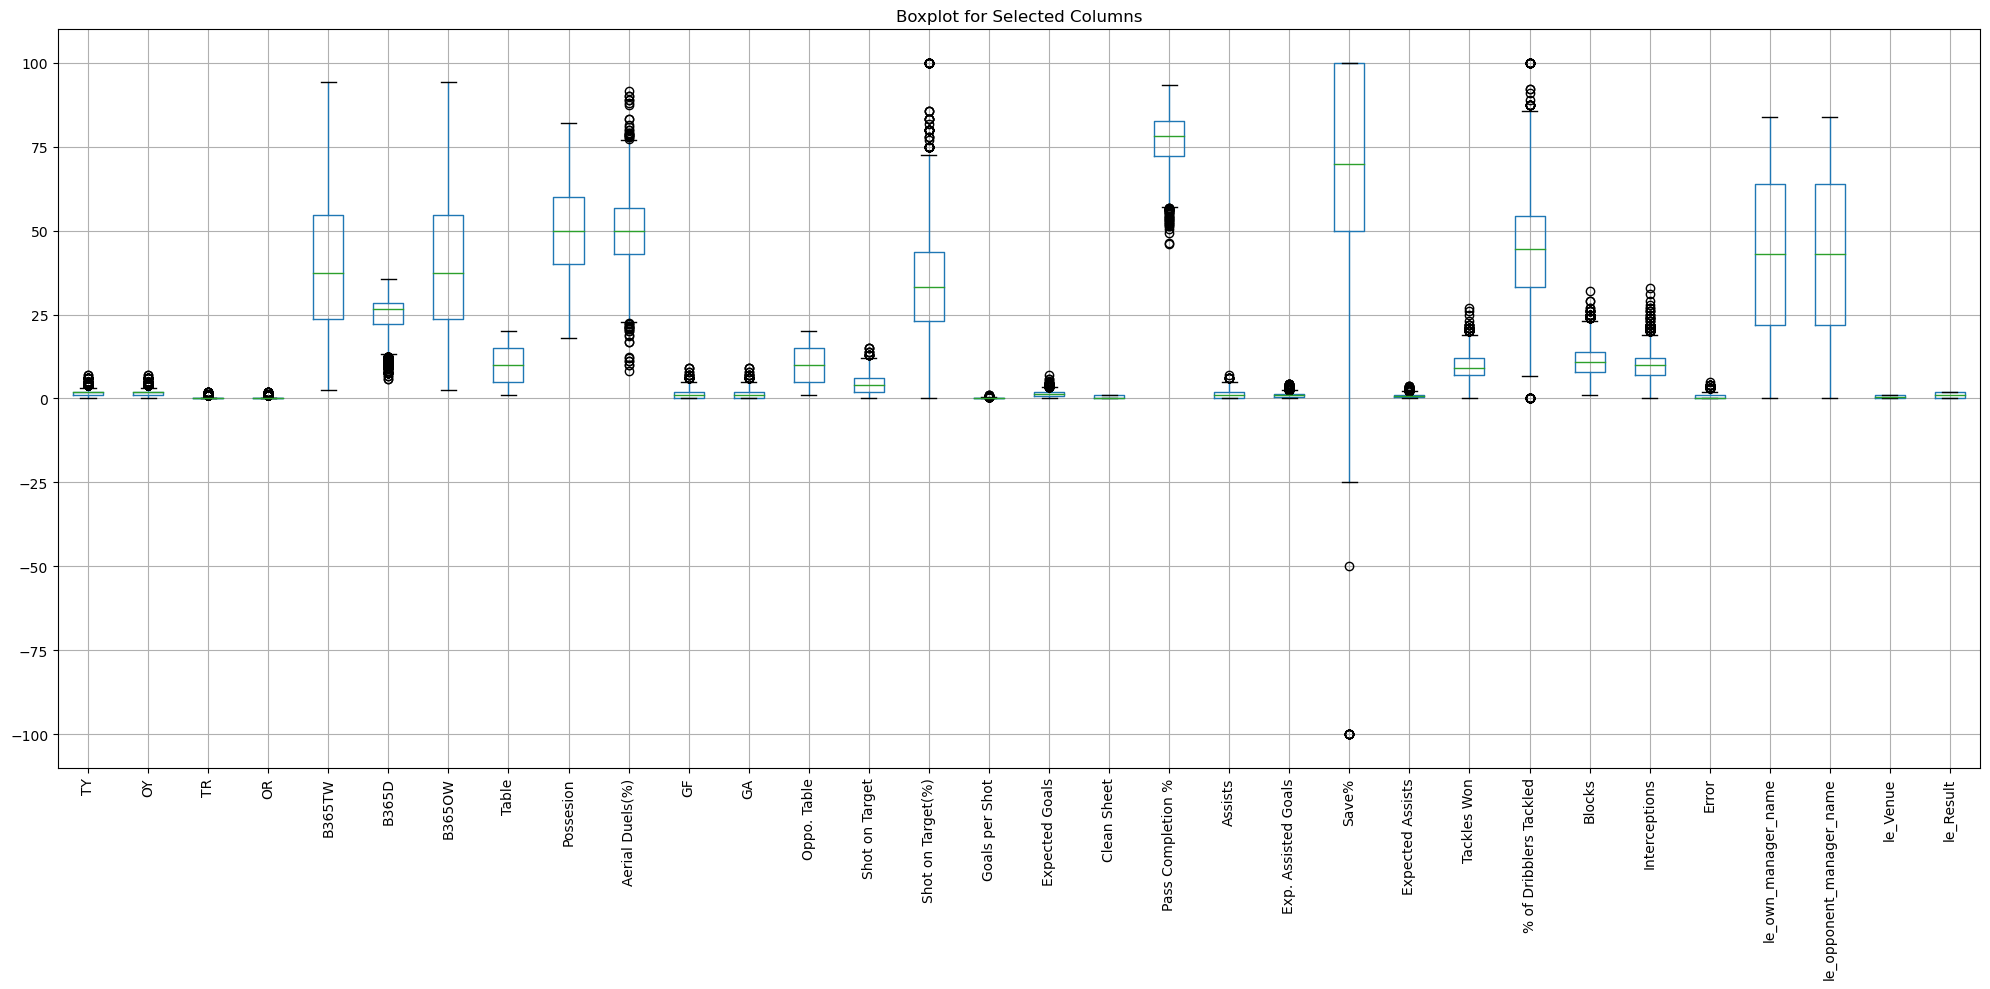

In [81]:
import pandas as pd
import matplotlib.pyplot as plt

data = modeling


columns_to_check = ['TY', 'OY', 'TR', 'OR', 'B365TW', 'B365D', 'B365OW', 'Table', 'Possesion', 
                    'Aerial Duels(%)', 'GF', 'GA', 'Oppo. Table', 'Shot on Target', 'Shot on Target(%)', 
                    'Goals per Shot', 'Expected Goals', 'Clean Sheet', 'Pass Completion %', 
                    'Assists', 'Exp. Assisted Goals','Save%','Expected Assists', 'Tackles Won', 
                    '% of Dribblers Tackled', 'Blocks', 'Interceptions', 'Error', 
                    'le_own_manager_name', 'le_opponent_manager_name', 'le_Venue', 'le_Result']

plt.figure(figsize=(20, 10))  # 그림의 크기 조절
data[columns_to_check].boxplot(rot=90)  # 이상치 확인을 원하는 컬럼에 대한 상자그림 그리기
plt.title('Boxplot for Selected Columns')  # 그래프 제목 설정
plt.tight_layout()  # 레이아웃 조정하여 레이블이 잘 보이게 함
plt.show()

In [82]:
# 이상치를 제거할 데이터프레임 생성
data_no_outliers = data.copy()

# 각 열에 대해 Z-score를 계산하여 이상치 제거
for column in columns_to_check:
    # Z-score 계산
    z_scores = (data_no_outliers[column] - data_no_outliers[column].mean()) / data_no_outliers[column].std()
    # Z-score가 3을 넘는 행 제거 (임의의 임계값)
    data_no_outliers = data_no_outliers[(np.abs(z_scores) <= 3)]

# 이상치가 제거된 데이터프레임 출력
data_no_outliers

,Date,club_id,opponent_id,TY,OY,TR,OR,B365TW,B365D,B365OW,...,Expected Assists,Tackles Won,% of Dribblers Tackled,Blocks,Interceptions,Error,le_own_manager_name,le_opponent_manager_name,le_Venue,le_Result
0,2018-08-12,11,281,2,2,0,0,25.000000,26.315789,51.282051,...,0.6,14,40.0,13,12,1,82,60,0,0
27,2018-08-18,11,631,2,0,0,0,22.222222,25.000000,55.555556,...,1.4,6,25.0,12,12,2,82,44,1,0
40,2018-08-25,11,379,1,3,0,0,73.529412,18.181818,11.111111,...,1.4,11,29.2,14,6,1,82,38,0,2
65,2018-09-02,11,603,4,3,0,0,63.694268,23.094688,15.384615,...,1.0,9,50.0,6,11,2,82,51,1,2
91,2018-09-15,11,762,0,0,0,0,52.631579,26.315789,23.809524,...,1.1,6,50.0,7,7,0,82,62,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4196,2024-01-02,1237,379,0,1,0,0,36.363636,26.666667,40.816327,...,1.9,6,54.5,7,8,0,67,17,1,1
4206,2024-01-22,1237,543,1,4,0,0,60.606061,23.094688,20.000000,...,1.7,10,37.5,7,7,0,67,25,0,1
4225,2024-01-30,1237,1031,2,2,0,0,57.142857,23.809524,23.809524,...,0.5,13,48.6,17,5,2,67,66,1,0
4275,2024-02-10,1237,148,3,2,0,0,26.315789,23.809524,55.555556,...,0.4,10,35.3,20,13,0,67,4,1,0


## 표준화

In [83]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 데이터 불러오기
data = data_no_outliers

# Date 컬럼 제거 (표준화에 영향을 미치지 않는 컬럼)
data = data.drop(columns=['Date','club_id','opponent_id'])

# 표준화를 위해 StandardScaler 객체 생성
scaler = StandardScaler()

# 데이터프레임에서 숫자형 컬럼들만 선택하여 표준화 수행
numeric_columns = data.select_dtypes(include=['int', 'float']).columns
numeric_columns = numeric_columns.drop('le_Result')  # le_Result 제외
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# 결과 출력
print(data)

            TY        OY   TR   OR    B365TW     B365D    B365OW     Table  \
0     0.237539  0.244907  0.0  0.0 -0.693323  0.189740  0.524481  0.754839   
27    0.237539 -1.361647  0.0  0.0 -0.829556 -0.068730  0.731630  1.107651   
40   -0.568006  1.048185  0.0  0.0  1.686743 -1.408078 -1.422724 -0.303597   
65    1.848629  1.048185  0.0  0.0  1.204390 -0.443005 -1.215575 -0.303597   
91   -1.373552 -1.361647  0.0  0.0  0.661834  0.189740 -0.807194 -0.656409   
...        ...       ...  ...  ...       ...       ...       ...       ...   
4196 -1.373552 -0.558370  0.0  0.0 -0.136007  0.258666  0.017176 -0.656409   
4206 -0.568006  1.851462  0.0  0.0  1.052933 -0.443005 -0.991853 -0.656409   
4225  0.237539  0.244907  0.0  0.0  0.883084 -0.302585 -0.807194 -0.303597   
4275  1.043084  0.244907  0.0  0.0 -0.628792 -0.302585  0.731630 -0.303597   
4345  1.848629  1.851462  0.0  0.0  0.805237 -0.068730 -0.749488 -0.480003   

      Possesion  Aerial Duels(%)  ...  Expected Assists  Tackle

In [84]:
# 'Save%' 열에 로그 스케일링 적용
data['Save%_log_scaled'] = np.log1p(data['Save%'])
data

/Users/t2023-m0093/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


,TY,OY,TR,OR,B365TW,B365D,B365OW,Table,Possesion,Aerial Duels(%),...,Tackles Won,% of Dribblers Tackled,Blocks,Interceptions,Error,le_own_manager_name,le_opponent_manager_name,le_Venue,le_Result,Save%_log_scaled
0,0.237539,0.244907,0.0,0.0,-0.693323,0.189740,0.524481,0.754839,-0.628649,1.352320,...,1.244920,-0.286221,0.412898,0.514231,1.037770,1.594423,0.668661,-1.013034,0,0.231550
27,0.237539,-1.361647,0.0,0.0,-0.829556,-0.068730,0.731630,1.107651,-0.949175,-0.554407,...,-1.036454,-1.303618,0.164882,0.514231,2.710608,1.594423,-0.003461,0.987134,0,0.164576
40,-0.568006,1.048185,0.0,0.0,1.686743,-1.408078,-1.422724,-0.303597,0.893852,0.001721,...,0.389405,-1.018747,0.660914,-1.010291,1.037770,1.594423,-0.255508,-1.013034,2,0.363305
65,1.848629,1.048185,0.0,0.0,1.204390,-0.443005,-1.215575,-0.303597,1.775300,-0.216758,...,-0.180939,0.392044,-1.323215,0.260144,2.710608,1.594423,0.290592,0.987134,2,NaN
91,-1.373552,-1.361647,0.0,0.0,0.661834,0.189740,-0.807194,-0.656409,1.054115,0.001721,...,-1.036454,0.392044,-1.075199,-0.756204,-0.635068,1.594423,0.752677,0.987134,2,-0.986318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4196,-1.373552,-0.558370,0.0,0.0,-0.136007,0.258666,0.017176,-0.656409,1.454774,0.786260,...,-1.036454,0.697264,-1.075199,-0.502117,-0.635068,0.964318,-1.137669,0.987134,1,0.764611
4206,-0.568006,1.851462,0.0,0.0,1.052933,-0.443005,-0.991853,-0.656409,1.775300,2.315614,...,0.104233,-0.455787,-1.075199,-0.756204,-0.635068,0.964318,-0.801608,-1.013034,1,0.764611
4225,0.237539,0.244907,0.0,0.0,0.883084,-0.302585,-0.807194,-0.303597,0.733589,0.001721,...,0.959748,0.297087,1.404963,-1.264378,2.710608,0.964318,0.920708,0.987134,0,-0.986318
4275,1.043084,0.244907,0.0,0.0,-0.628792,-0.302585,0.731630,-0.303597,-0.147859,-2.669682,...,0.104233,-0.605005,2.149012,0.768318,-0.635068,0.964318,-1.683769,0.987134,0,-0.034728


In [85]:
modeling

,Date,club_id,opponent_id,TY,OY,TR,OR,B365TW,B365D,B365OW,...,Expected Assists,Tackles Won,% of Dribblers Tackled,Blocks,Interceptions,Error,le_own_manager_name,le_opponent_manager_name,le_Venue,le_Result
0,2018-08-12,11,281,2,2,0,0,25.000000,26.315789,51.282051,...,0.6,14,40.0,13,12,1,82,60,0,0
27,2018-08-18,11,631,2,0,0,0,22.222222,25.000000,55.555556,...,1.4,6,25.0,12,12,2,82,44,1,0
40,2018-08-25,11,379,1,3,0,0,73.529412,18.181818,11.111111,...,1.4,11,29.2,14,6,1,82,38,0,2
65,2018-09-02,11,603,4,3,0,0,63.694268,23.094688,15.384615,...,1.0,9,50.0,6,11,2,82,51,1,2
91,2018-09-15,11,762,0,0,0,0,52.631579,26.315789,23.809524,...,1.1,6,50.0,7,7,0,82,62,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4275,2024-02-10,1237,148,3,2,0,0,26.315789,23.809524,55.555556,...,0.4,10,35.3,20,13,0,67,4,1,0
4296,2024-02-18,1237,350,4,1,0,1,61.728395,23.809524,20.000000,...,2.3,10,47.1,10,4,0,67,12,1,2
4306,2024-02-24,1237,29,2,3,1,0,54.644809,26.315789,23.809524,...,1.0,8,25.0,6,4,0,67,73,0,1
4325,2024-03-02,1237,931,2,1,0,0,38.022814,27.777778,39.215686,...,1.4,12,73.3,15,8,3,67,40,1,0


In [86]:
data

,TY,OY,TR,OR,B365TW,B365D,B365OW,Table,Possesion,Aerial Duels(%),...,Tackles Won,% of Dribblers Tackled,Blocks,Interceptions,Error,le_own_manager_name,le_opponent_manager_name,le_Venue,le_Result,Save%_log_scaled
0,0.237539,0.244907,0.0,0.0,-0.693323,0.189740,0.524481,0.754839,-0.628649,1.352320,...,1.244920,-0.286221,0.412898,0.514231,1.037770,1.594423,0.668661,-1.013034,0,0.231550
27,0.237539,-1.361647,0.0,0.0,-0.829556,-0.068730,0.731630,1.107651,-0.949175,-0.554407,...,-1.036454,-1.303618,0.164882,0.514231,2.710608,1.594423,-0.003461,0.987134,0,0.164576
40,-0.568006,1.048185,0.0,0.0,1.686743,-1.408078,-1.422724,-0.303597,0.893852,0.001721,...,0.389405,-1.018747,0.660914,-1.010291,1.037770,1.594423,-0.255508,-1.013034,2,0.363305
65,1.848629,1.048185,0.0,0.0,1.204390,-0.443005,-1.215575,-0.303597,1.775300,-0.216758,...,-0.180939,0.392044,-1.323215,0.260144,2.710608,1.594423,0.290592,0.987134,2,NaN
91,-1.373552,-1.361647,0.0,0.0,0.661834,0.189740,-0.807194,-0.656409,1.054115,0.001721,...,-1.036454,0.392044,-1.075199,-0.756204,-0.635068,1.594423,0.752677,0.987134,2,-0.986318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4196,-1.373552,-0.558370,0.0,0.0,-0.136007,0.258666,0.017176,-0.656409,1.454774,0.786260,...,-1.036454,0.697264,-1.075199,-0.502117,-0.635068,0.964318,-1.137669,0.987134,1,0.764611
4206,-0.568006,1.851462,0.0,0.0,1.052933,-0.443005,-0.991853,-0.656409,1.775300,2.315614,...,0.104233,-0.455787,-1.075199,-0.756204,-0.635068,0.964318,-0.801608,-1.013034,1,0.764611
4225,0.237539,0.244907,0.0,0.0,0.883084,-0.302585,-0.807194,-0.303597,0.733589,0.001721,...,0.959748,0.297087,1.404963,-1.264378,2.710608,0.964318,0.920708,0.987134,0,-0.986318
4275,1.043084,0.244907,0.0,0.0,-0.628792,-0.302585,0.731630,-0.303597,-0.147859,-2.669682,...,0.104233,-0.605005,2.149012,0.768318,-0.635068,0.964318,-1.683769,0.987134,0,-0.034728


In [87]:
date_club_id = modeling[['Date', 'club_id','opponent_id']]

# 표준화된 데이터프레임에 'Date'와 'club_id' 컬럼 추가
data_with_ids = pd.concat([date_club_id, data.reset_index()], axis=1)

# 결과 확인
print(data_with_ids)

           Date  club_id  opponent_id   index        TY        OY   TR   OR  \
0    2018-08-12       11          281     0.0  0.237539  0.244907  0.0  0.0   
27   2018-08-18       11          631   740.0 -0.568006  2.654740  0.0  0.0   
40   2018-08-25       11          379  1270.0 -1.373552  0.244907  0.0  0.0   
65   2018-09-02       11          603  1786.0  1.043084 -0.558370  0.0  0.0   
91   2018-09-15       11          762  2501.0  0.237539  2.654740  0.0  0.0   
...         ...      ...          ...     ...       ...       ...  ...  ...   
4275 2024-02-10     1237          148     NaN       NaN       NaN  NaN  NaN   
4296 2024-02-18     1237          350     NaN       NaN       NaN  NaN  NaN   
4306 2024-02-24     1237           29     NaN       NaN       NaN  NaN  NaN   
4325 2024-03-02     1237          931     NaN       NaN       NaN  NaN  NaN   
4345 2024-03-10     1237          703     NaN       NaN       NaN  NaN  NaN   

        B365TW     B365D  ...  Tackles Won  % of Dr

In [88]:
non_app_features = ['club_id', 'opponent_id', 'B365TW', 'B365D', 'B365OW', 'Table', 'Oppo. Table', 
'le_own_manager_name', 'le_opponent_manager_name', 'le_Venue', 'le_Result']

In [89]:
app_features = ['Date', 'club_id', 'TY', 'OY', 'TR', 'OR', 'Possesion', 'Aerial Duels(%)', 'GF', 'GA',
'Shot on Target', 'Shot on Target(%)', 'Goals per Shot',
'Expected Goals', 'Save%_log_scaled', 'Clean Sheet', 'Pass Completion %',
'Assists', 'Exp. Assisted Goals', 'Expected Assists', 'Tackles Won',
'% of Dribblers Tackled', 'Blocks', 'Interceptions', 'Error']

In [90]:
selected_col = ['TY', 'OY', 'TR', 'OR', 'Possesion', 'Aerial Duels(%)', 'GF', 'GA',
'Shot on Target', 'Shot on Target(%)', 'Goals per Shot',
'Expected Goals', 'Save%_log_scaled', 'Clean Sheet', 'Pass Completion %',
'Assists', 'Exp. Assisted Goals', 'Expected Assists', 'Tackles Won',
'% of Dribblers Tackled', 'Blocks', 'Interceptions', 'Error']

In [91]:
data_with_ids[app_features]

,Date,club_id,TY,OY,TR,OR,Possesion,Aerial Duels(%),GF,GA,...,Clean Sheet,Pass Completion %,Assists,Exp. Assisted Goals,Expected Assists,Tackles Won,% of Dribblers Tackled,Blocks,Interceptions,Error
0,2018-08-12,11,0.237539,0.244907,0.0,0.0,-0.628649,1.352320,-1.150593,0.503809,...,-0.601601,0.040112,-0.961622,-0.780989,-0.503538,1.244920,-0.286221,0.412898,0.514231,1.037770
27,2018-08-18,11,-0.568006,2.654740,0.0,0.0,0.813720,-0.405444,1.568263,-0.324417,...,-0.601601,0.864480,1.299687,2.367054,2.692500,-0.751282,-0.740658,-1.819248,-1.010291,-0.635068
40,2018-08-25,11,-1.373552,0.244907,0.0,0.0,1.134247,0.994808,1.568263,-0.324417,...,-0.601601,1.297622,2.430341,0.700443,-0.046961,-0.751282,0.392044,-0.827183,-0.248030,1.037770
65,2018-09-02,11,1.043084,-0.558370,0.0,0.0,0.573326,-0.822541,-0.244308,0.503809,...,-0.601601,1.381456,-0.961622,-0.780989,-0.275249,-1.036454,-0.170916,0.164882,-0.502117,-0.635068
91,2018-09-15,11,0.237539,2.654740,0.0,0.0,0.252799,-0.762956,1.568263,-0.324417,...,-0.601601,0.459282,1.299687,0.885622,0.866193,0.104233,-0.286221,0.164882,-0.756204,1.037770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4275,2024-02-10,1237,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4296,2024-02-18,1237,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4306,2024-02-24,1237,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4325,2024-03-02,1237,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
moving_avg = data_with_ids[app_features].groupby('club_id')[selected_col].rolling(window=5).mean().reset_index(drop=True)
moving_avg

,TY,OY,TR,OR,Possesion,Aerial Duels(%),GF,GA,Shot on Target,Shot on Target(%),...,Clean Sheet,Pass Completion %,Assists,Exp. Assisted Goals,Expected Assists,Tackles Won,% of Dribblers Tackled,Blocks,Interceptions,Error
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-0.084679,1.048185,0.0,0.0,0.429089,0.071237,0.661978,0.006873,0.092791,-0.254101,...,-0.601601,0.80859,0.621294,0.478228,0.546589,-0.237973,-0.218394,-0.380754,-0.400482,0.368635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4361,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
m_final = pd.concat([data_with_ids[non_app_features], moving_avg], axis=1)
cleaned_final = m_final.dropna()

In [94]:
corr = cleaned_final.corr()

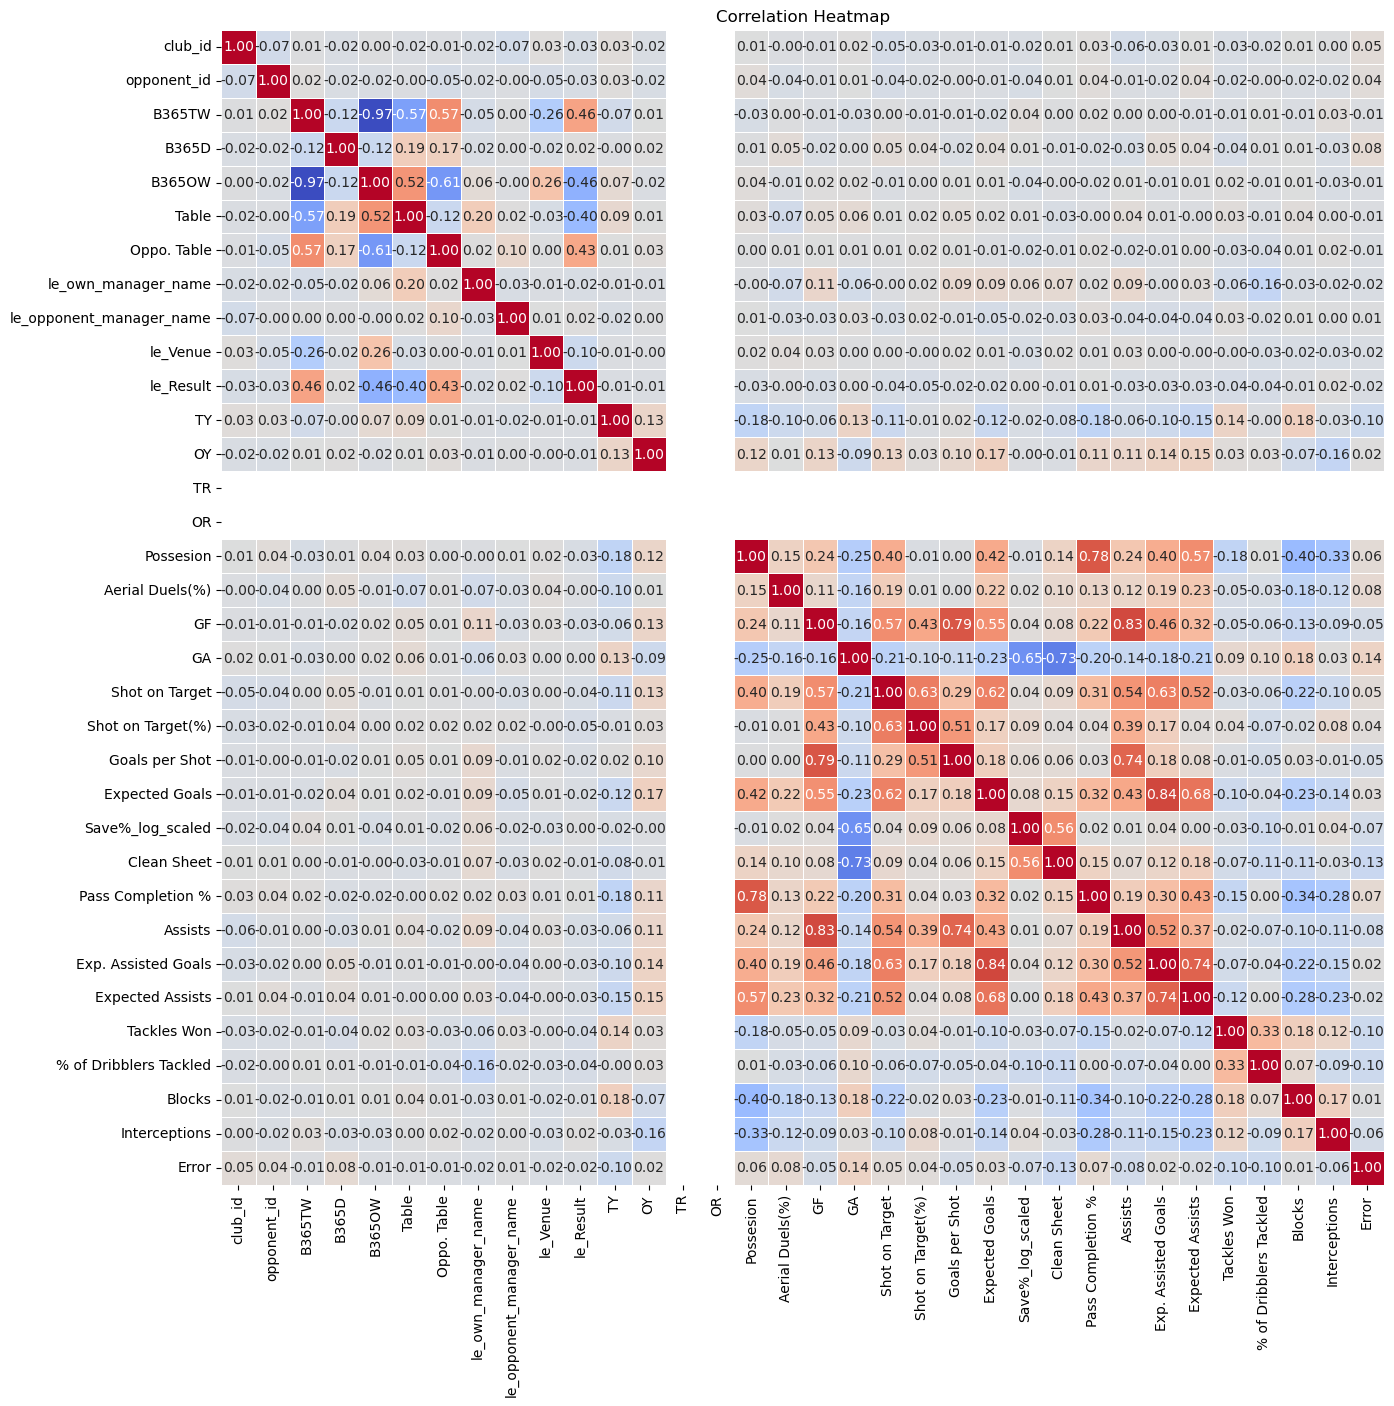

In [95]:
# 상관관계 그래프 그리기
plt.figure(figsize=(15, 15))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, cbar=False)
plt.title('Correlation Heatmap')
plt.show()

In [96]:
cleaned_final.columns

Index(['club_id', 'opponent_id', 'B365TW', 'B365D', 'B365OW', 'Table',
       'Oppo. Table', 'le_own_manager_name', 'le_opponent_manager_name',
       'le_Venue', 'le_Result', 'TY', 'OY', 'TR', 'OR', 'Possesion',
       'Aerial Duels(%)', 'GF', 'GA', 'Shot on Target', 'Shot on Target(%)',
       'Goals per Shot', 'Expected Goals', 'Save%_log_scaled', 'Clean Sheet',
       'Pass Completion %', 'Assists', 'Exp. Assisted Goals',
       'Expected Assists', 'Tackles Won', '% of Dribblers Tackled', 'Blocks',
       'Interceptions', 'Error'],
      dtype='object')

In [97]:
modeling_features = ['club_id', 'opponent_id', 'B365TW', 'B365D', 'B365OW', 'Table',
       'Oppo. Table', 'le_own_manager_name', 'le_opponent_manager_name',
       'le_Venue', 'TY', 'OY', 'TR', 'OR', 'Possesion',
       'Aerial Duels(%)', 'GF', 'GA', 'Shot on Target', 'Shot on Target(%)',
       'Goals per Shot', 'Expected Goals', 'Save%_log_scaled', 'Clean Sheet',
       'Pass Completion %', 'Assists', 'Exp. Assisted Goals',
       'Expected Assists', 'Tackles Won', '% of Dribblers Tackled', 'Blocks',
       'Interceptions', 'Error']

In [98]:
X = cleaned_final[modeling_features]
y = cleaned_final['le_Result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [99]:
cleaned_final['le_Result']

40      2.0
65      0.0
91      2.0
120     2.0
160     2.0
       ... 
3106    0.0
3124    2.0
3289    1.0
3307    0.0
3343    1.0
Name: le_Result, Length: 1166, dtype: float64

In [100]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.6025641025641025
F1 Score: 0.5750062320418794


In [101]:
xgb_model = xgb.XGBClassifier(n_estimators=200, random_state=42)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.5555555555555556
F1 Score: 0.5575385871083571


In [102]:
estimator = RandomForestClassifier(n_estimators=100, random_state=42) # 학습시킬 모델 지정
selector = RFECV(estimator, step=1, cv = 5) # 한 step에 제거할 featrue 개수 및 cross validation fold 수 지정
selector = selector.fit(X_train, y_train) # feature selection 진행

In [103]:
selector.support_

array([False, False,  True, False,  True,  True,  True, False, False,
       False, False, False, False, False,  True,  True, False, False,
       False,  True,  True,  True,  True, False,  True, False,  True,
        True, False,  True,  True,  True, False])

In [104]:
selected_columns = X_train.columns[selector.support_]
selected_columns

Index(['B365TW', 'B365OW', 'Table', 'Oppo. Table', 'Possesion',
       'Aerial Duels(%)', 'Shot on Target(%)', 'Goals per Shot',
       'Expected Goals', 'Save%_log_scaled', 'Pass Completion %',
       'Exp. Assisted Goals', 'Expected Assists', '% of Dribblers Tackled',
       'Blocks', 'Interceptions'],
      dtype='object')

In [105]:
# 선택된 변수들만 해서 다시 모델링 
rfecv_selected_col = ['B365TW', 'B365OW', 'Table', 'Oppo. Table', 'Aerial Duels(%)',
       'Shot on Target(%)', 'Pass Completion %', '% of Dribblers Tackled']

In [106]:
X = cleaned_final[rfecv_selected_col]
y = cleaned_final['le_Result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [107]:
# 랜덤포레스트
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.6111111111111112
F1 Score: 0.5989262060690633


In [108]:
rf_model2 = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_model2.fit(X_train, y_train)

y_pred = rf_model2.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.6452991452991453
F1 Score: 0.5920141286325569


In [109]:
rf_model3 = RandomForestClassifier(n_estimators=100, max_depth=6, random_state=42)
rf_model3.fit(X_train, y_train)

y_pred = rf_model3.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.6196581196581197
F1 Score: 0.5809976419655278


In [110]:
rf_model4 = RandomForestClassifier(n_estimators=100, max_depth=7, random_state=42)
rf_model4.fit(X_train, y_train)

y_pred = rf_model4.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.6196581196581197
F1 Score: 0.5862831648804934


In [111]:
rf_model4 = RandomForestClassifier(n_estimators=200, max_depth=5, random_state=42)
rf_model4.fit(X_train, y_train)

y_pred = rf_model4.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.6324786324786325
F1 Score: 0.5764706803168342


In [112]:
rf_model5 = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_model5.fit(X_train, y_train)

y_pred = rf_model2.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.6452991452991453
F1 Score: 0.5920141286325569
